In [1]:
# Import libraries
import numpy as np
import pandas as pd

headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', sep='\s+', names= headers)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis (EDA)

In [2]:
print("Shape of Dataset:", df.shape)
df.isnull().sum()

Shape of Dataset: (506, 14)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

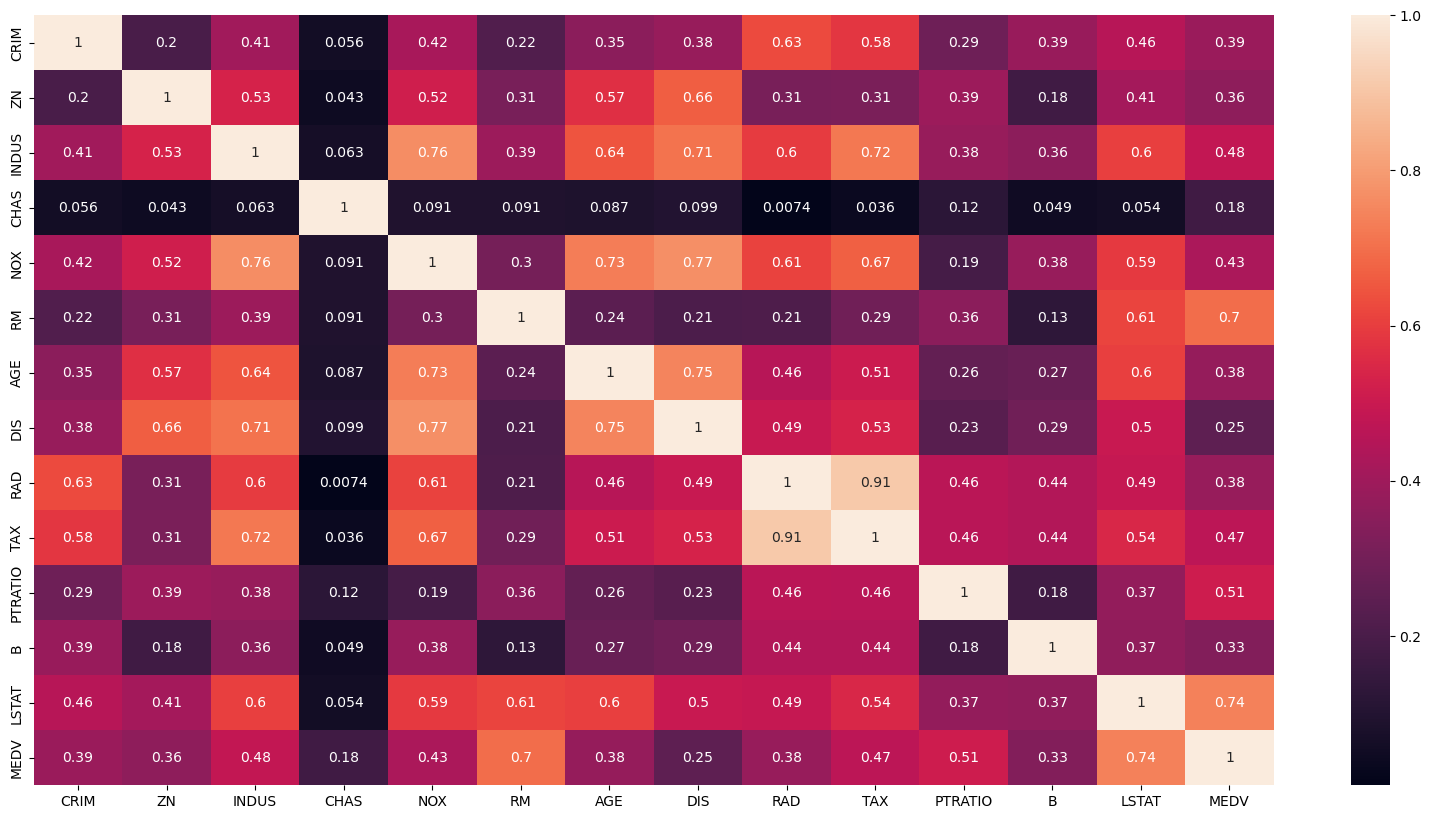

In [5]:
# Plotting the heatmap of correlation between features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

<AxesSubplot:>

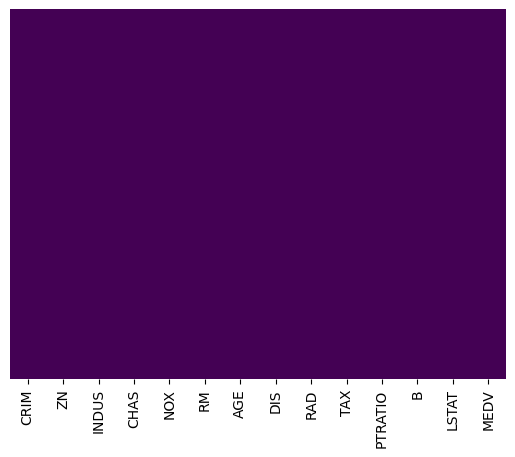

In [6]:
# Checking the null values using heatmap
# There is any null values are occupyed here

sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap= viridis')

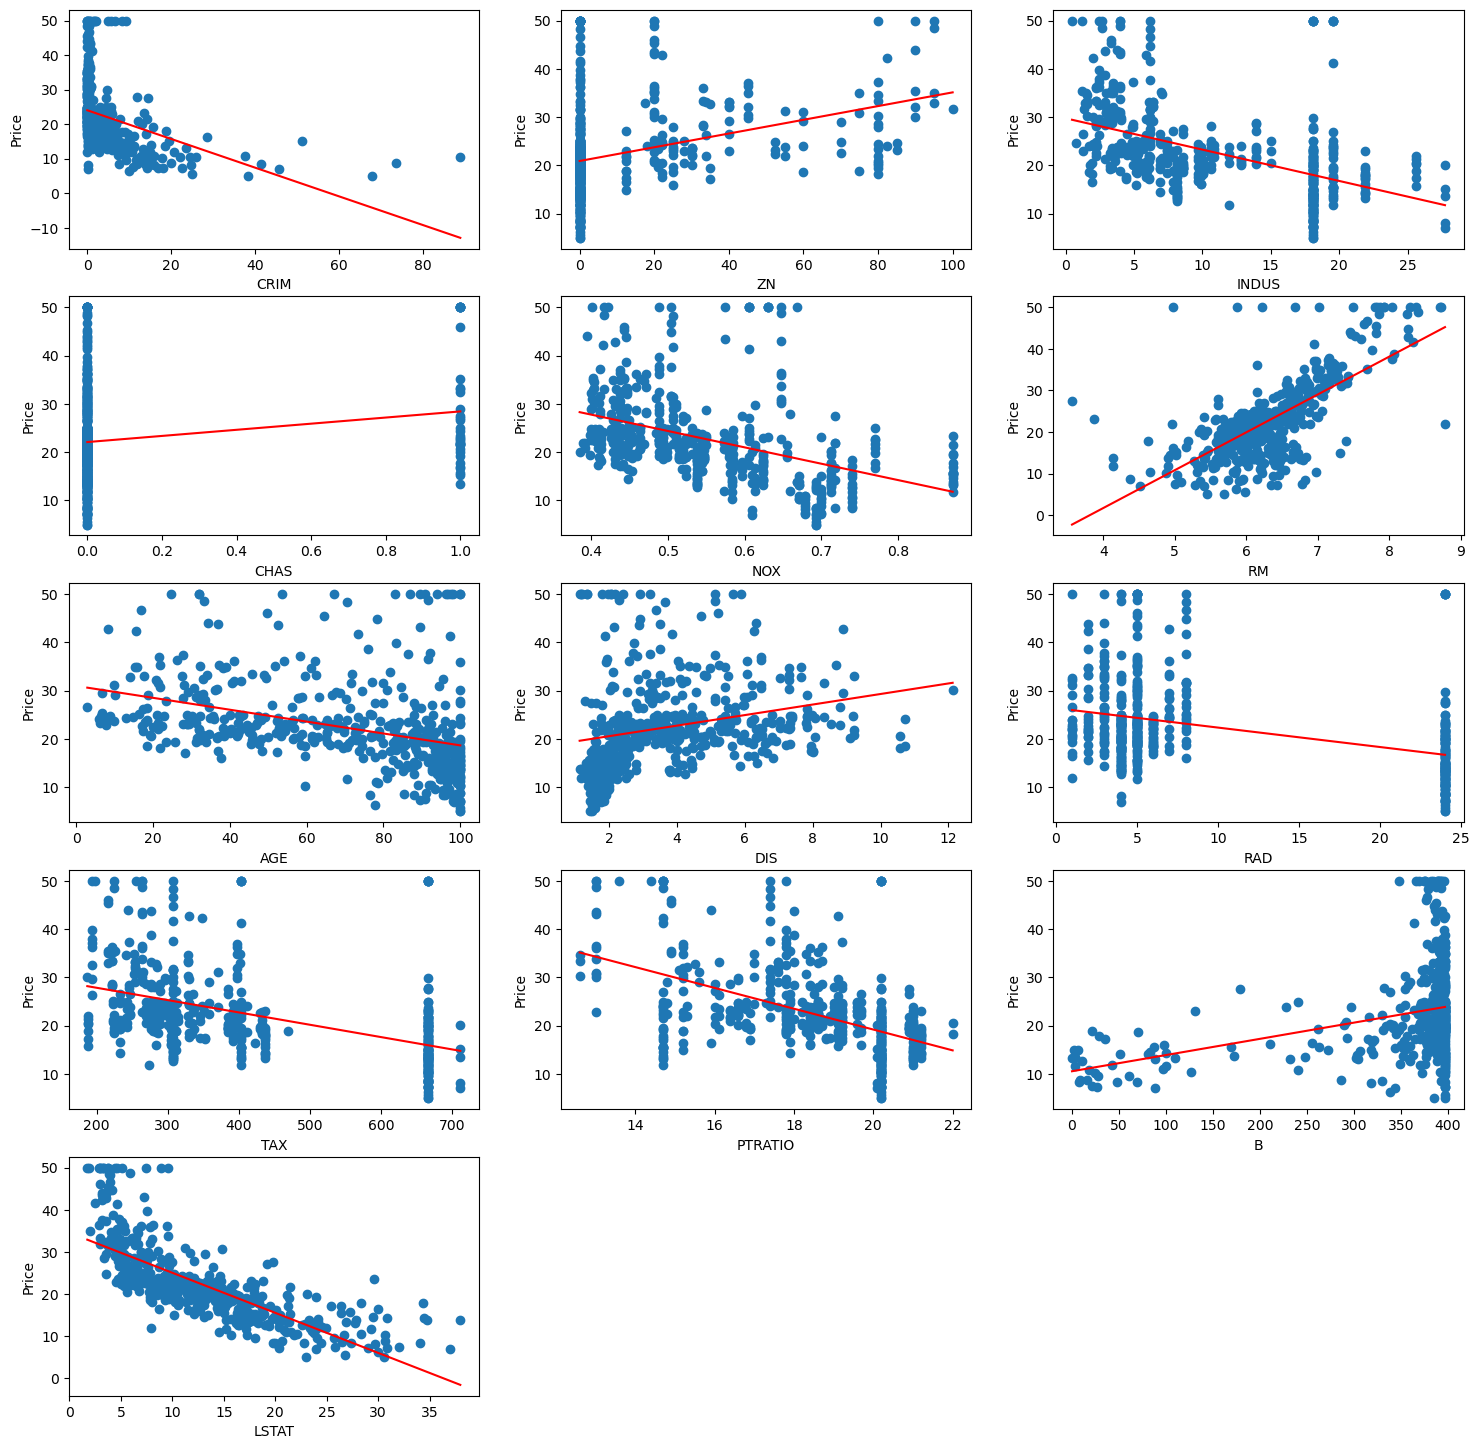

In [7]:
# Showing the linear relationship between features and price [MEDV]

from scipy import stats
plt.figure(figsize=(18, 18))

for i, idx in enumerate(df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = df[idx] 
    y = df['MEDV']
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('Price')

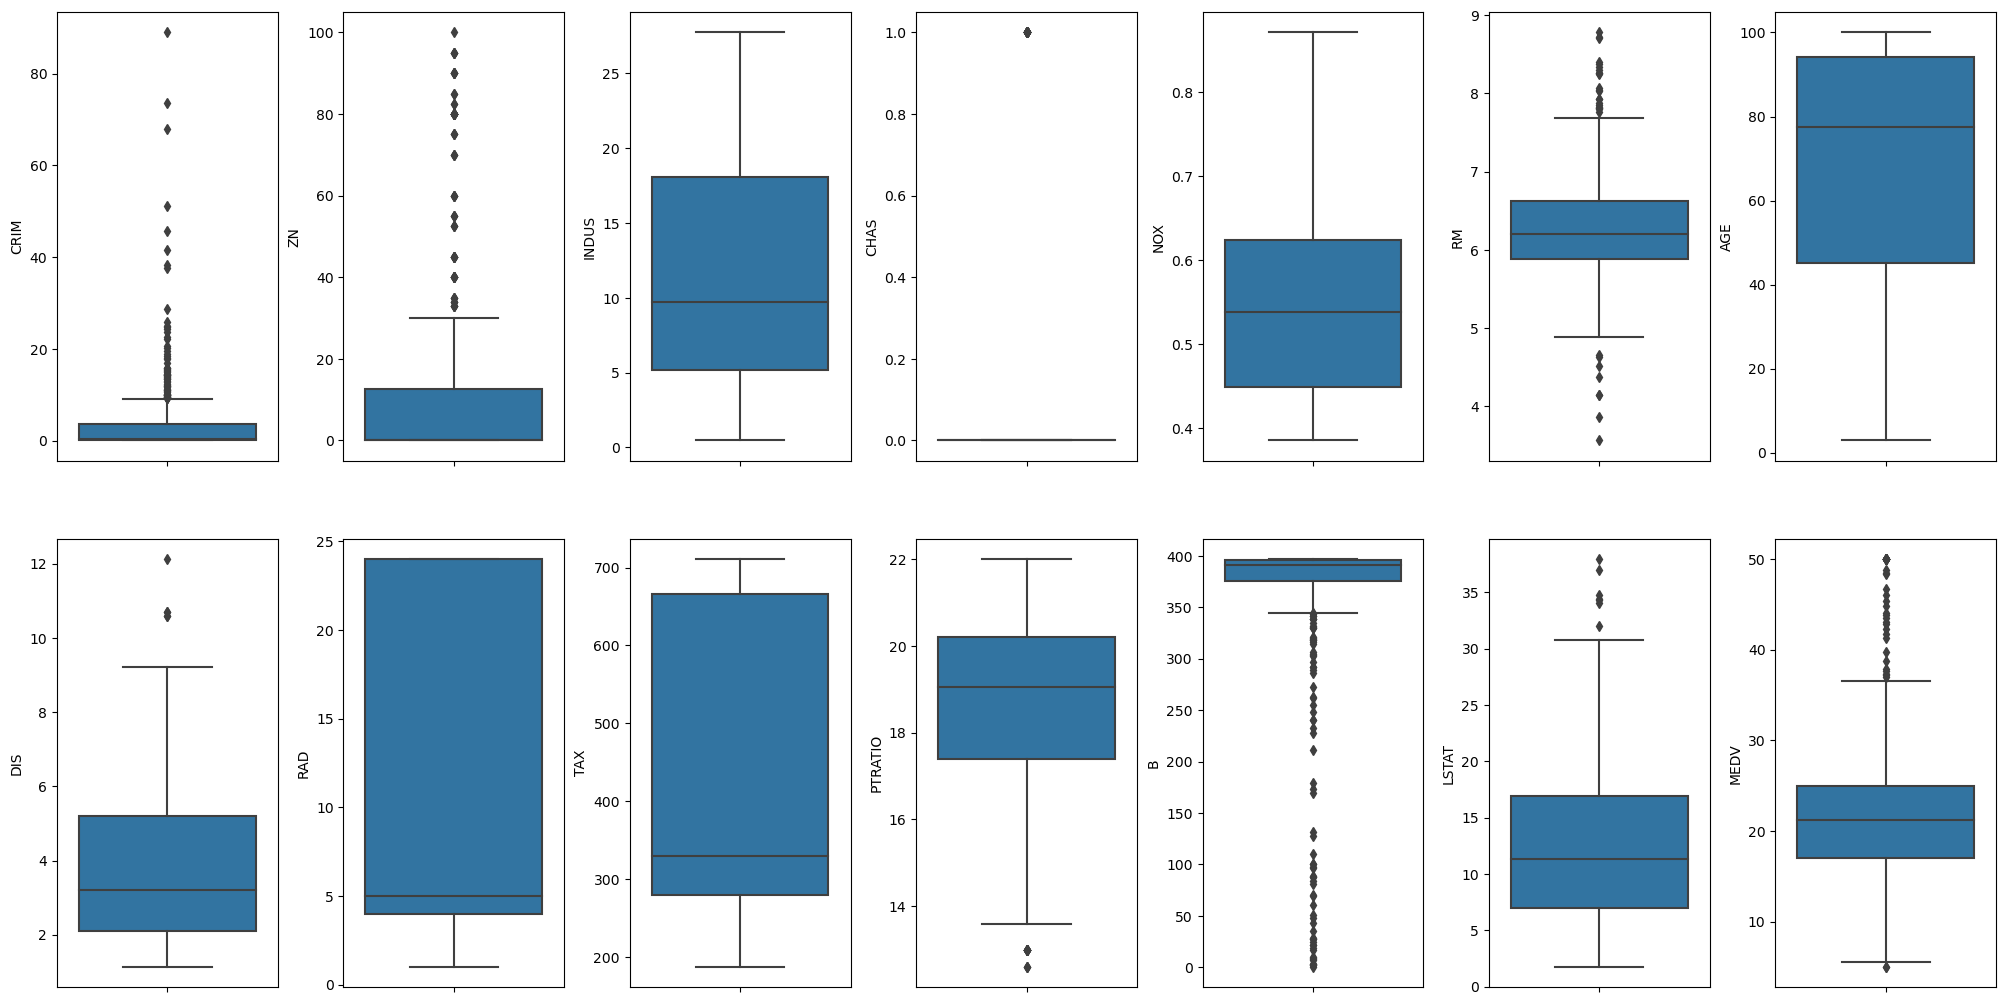

In [8]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Model Fitting

In [9]:
x = df.iloc[:,0:13] 
y = df.iloc[:,-1] 

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
print('Training Shape: ',x_train.shape)
print('Testing  Shape: ',x_test.shape)

Training Shape:  (404, 13)
Testing  Shape:  (102, 13)


### Linear Regression

Training Accuracy:  75.08856358979673
Testing Accuracy:  66.87594935356336
Model Accuracy:  73.7317460942428


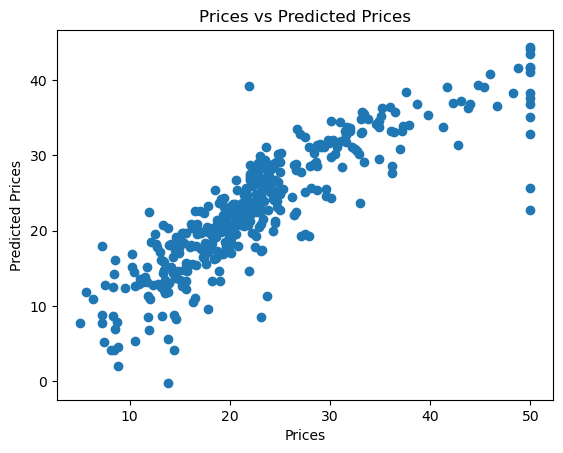

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

### Decision Tree

Training Accuracy:  100.0
Testing Accuracy:  76.75442066335233
Model Accuracy:  95.9294691098409


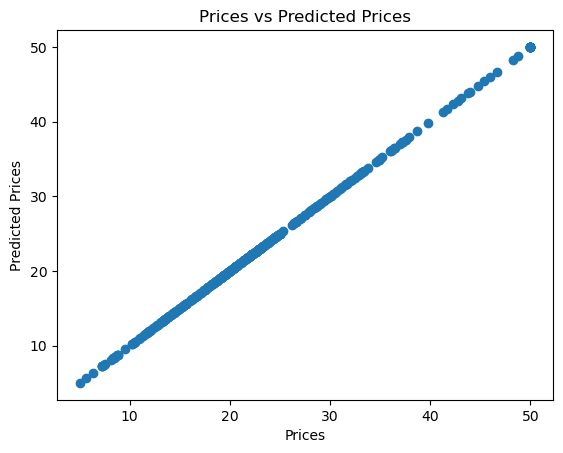

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

### Random Forest

Training Accuracy:  97.8430352668449
Testing Accuracy:  89.02613310251793
Model Accuracy:  96.30614721695835


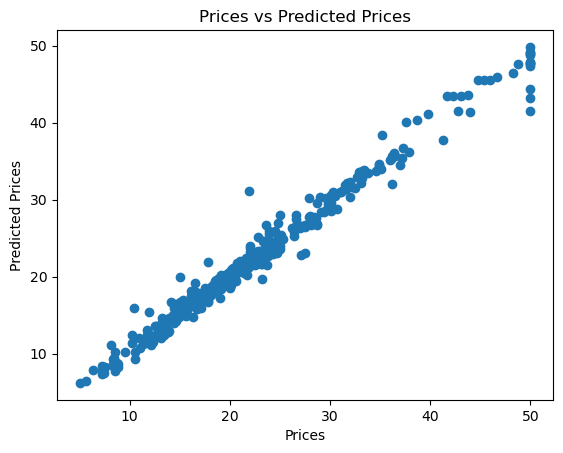

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

### XGBoost (Best)

Training Accuracy:  99.99953622164942
Testing Accuracy:  91.05388132305845
Model Accuracy:  98.43306507074689


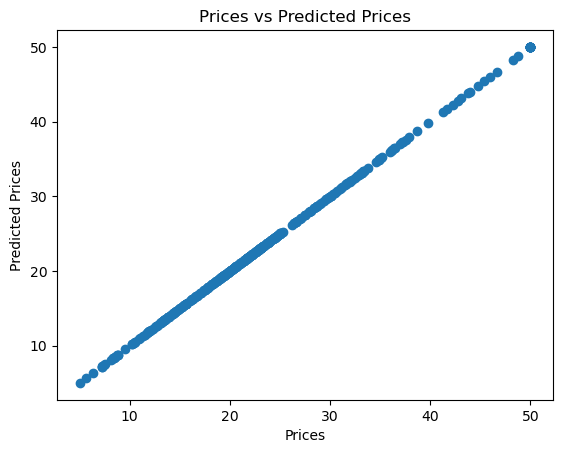

In [14]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

## Conclusion
Tried 4 models (Linear Regression, Decision Tree, Random Forest, XGBoost) the best one was **XGBoost** with the following results:
* Training Accuracy:  99.99953622164942
* Testing Accuracy:  91.05388132305845
* Model Accuracy:  98.43306507074689